# Melhorias a serem feitas:
- Analisar os dados de maneira normalizada para uma analise mais acertiva da diferença entre cada um dos grupos.
- Cruzar os dados com a quantidade da população da faixa etaria que faz enem para verificar % da população que tenta o SISU.

# Imports

In [2]:
import keras
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import statistics as stt
import csv
from datetime import datetime

# Visualização

In [3]:
#Adicione o endeço do arquivo ListagemListaEspera_2021-1
endereco = 'C:/Users/raphi/OneDrive/Área de Trabalho/horas de ext/ListagemListaEspera_2021-1.csv'
ListEsp = pd.read_csv(endereco,sep='|', encoding='latin-1')  
ListEsp.head()

C:\Users\raphi\AppData\Local\Temp\ipykernel_9120\3353177060.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  ListEsp = pd.read_csv('C:/Users/raphi/OneDrive/Área de Trabalho/horas de ext/ListagemListaEspera_2021-1.csv',sep='|', encoding='latin-1')


NU_ANO  NU_EDICAO  CO_ETAPA         DS_ETAPA  CO_IES  \
0    2021          1         7  LISTA DE ESPERA       3   
1    2021          1         7  LISTA DE ESPERA       3   
2    2021          1         7  LISTA DE ESPERA       3   
3    2021          1         7  LISTA DE ESPERA       3   
4    2021          1         7  LISTA DE ESPERA       3   

                            NO_IES SIGLA_IES SG_UF_IES  CO_CAMPUS  \
0  UNIVERSIDADE FEDERAL DE SERGIPE       UFS        SE    1006435   
1  UNIVERSIDADE FEDERAL DE SERGIPE       UFS        SE    1006435   
2  UNIVERSIDADE FEDERAL DE SERGIPE       UFS        SE    1006435   
3  UNIVERSIDADE FEDERAL DE SERGIPE       UFS        SE    1006435   
4  UNIVERSIDADE FEDERAL DE SERGIPE       UFS        SE    1006435   

      NO_CAMPUS  ... NU_NOTA_R NOTA_L_COM_PESO  NOTA_CH_COM_PESO  \
0  Unidade SEDE  ...       780          1148,6            760,65   
1  Unidade SEDE  ...       600          1085,4             773,1   
2  Unidade SEDE  ...       500          1055,4               801   
3  Unidade SEDE  ...       660          1137,4               801   
4  Unidade SEDE  ...       760          1088,8             700,5   

  NOTA_CN_COM_PESO NOTA_M_COM_PESO NOTA_R_COM_PESO NU_NOTA_CANDIDATO  \
0             1206          736,95            1560            541,22   
1           1698,6          604,95            1200            536,21   
2           1317,6          688,05            1000            486,21   
3           1578,9          725,85            1320            556,32   
4           1551,3           718,2            1520            557,88   

  NU_NOTACORTE  NU_CLASSIFICACAO  ST_APROVADO  
0       572,54                11            S  
1       572,54                13            S  
2        585,9                46            S  
3       606,06                18            S  
4        585,9                12            S  

[5 rows x 52 columns]

# Exclusão de dados que não serão utilizados

In [4]:
ListEsp = ListEsp.drop(['CO_ETAPA', 'DS_ETAPA', 'CO_IES', 'NO_IES', 'CO_CAMPUS', 'CO_IES_CURSO'], axis=1)
ListEsp.head()
#para mais informações sobre os dados acesse o link abaixo:
#https://dadosabertos.mec.gov.br/sisu/item/133-dicionario-de-dados

NU_ANO  NU_EDICAO SIGLA_IES SG_UF_IES     NO_CAMPUS SG_UF_CAMPUS  \
0    2021          1       UFS        SE  Unidade SEDE           SE   
1    2021          1       UFS        SE  Unidade SEDE           SE   
2    2021          1       UFS        SE  Unidade SEDE           SE   
3    2021          1       UFS        SE  Unidade SEDE           SE   
4    2021          1       UFS        SE  Unidade SEDE           SE   

  NO_MUNUCIPIO_CAMPUS         NO_CURSO       DS_GRAU    DS_TURNO  ...  \
0       São Cristóvão  EDUCAÇÃO FÍSICA  Licenciatura  Vespertino  ...   
1       São Cristóvão  EDUCAÇÃO FÍSICA  Licenciatura  Vespertino  ...   
2       São Cristóvão  EDUCAÇÃO FÍSICA  Licenciatura  Vespertino  ...   
3       São Cristóvão  EDUCAÇÃO FÍSICA  Licenciatura  Vespertino  ...   
4       São Cristóvão  EDUCAÇÃO FÍSICA  Licenciatura  Vespertino  ...   

  NU_NOTA_R NOTA_L_COM_PESO  NOTA_CH_COM_PESO  NOTA_CN_COM_PESO  \
0       780          1148,6            760,65              1206   
1       600          1085,4             773,1            1698,6   
2       500          1055,4               801            1317,6   
3       660          1137,4               801            1578,9   
4       760          1088,8             700,5            1551,3   

  NOTA_M_COM_PESO  NOTA_R_COM_PESO NU_NOTA_CANDIDATO  NU_NOTACORTE  \
0          736,95             1560            541,22        572,54   
1          604,95             1200            536,21        572,54   
2          688,05             1000            486,21         585,9   
3          725,85             1320            556,32        606,06   
4           718,2             1520            557,88         585,9   

   NU_CLASSIFICACAO  ST_APROVADO  
0                11            S  
1                13            S  
2                46            S  
3                18            S  
4                12            S  

[5 rows x 46 columns]

# Quantidade e porcentagem por sexo

<AxesSubplot:title={'center':'Lista de Espera por Sexo'}>

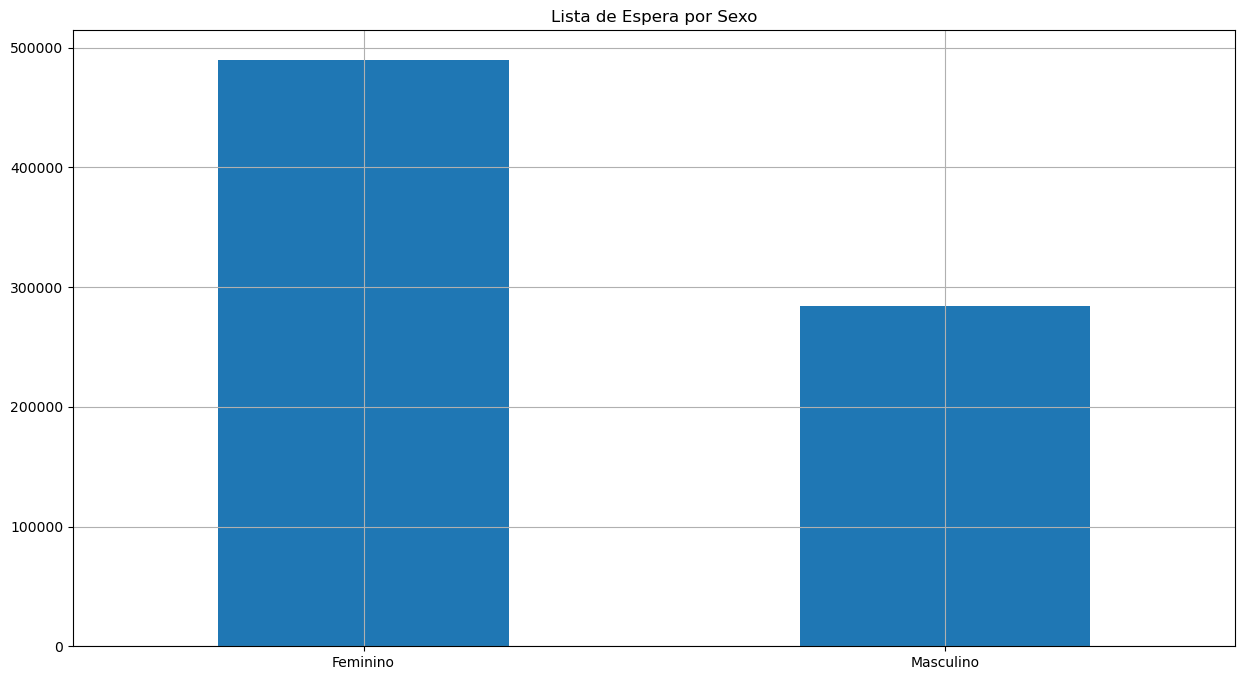

In [5]:
sexo_br = ListEsp.groupby('TP_SEXO').count()
sexo_br = sexo_br['NU_ANO']
sexo_br.index = ['Feminino', 'Masculino']
sexo_br.plot(kind='bar',title='Lista de Espera por Sexo', figsize=(15,8), rot=0, grid=True)

<AxesSubplot:title={'center':'Lista de Espera por Sexo'}>

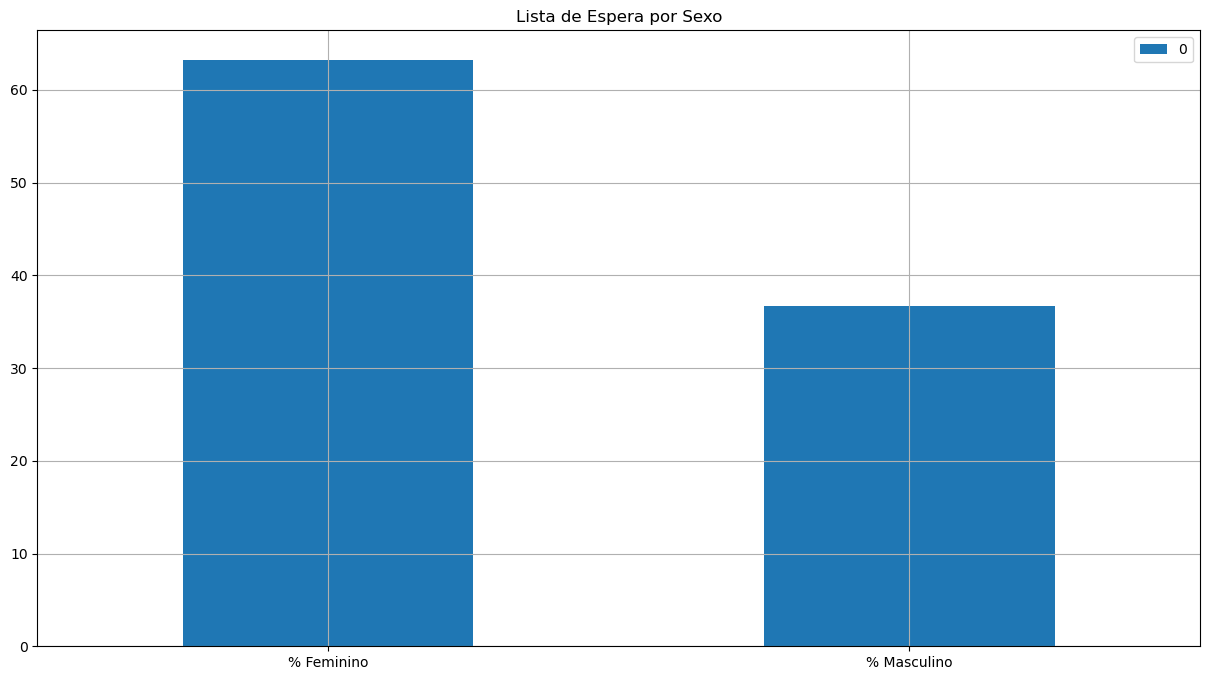

In [6]:
pc_sexo_br = pd.DataFrame([100 * sexo_br.Feminino / (sexo_br.Feminino + sexo_br.Masculino), 100 * sexo_br.Masculino / (sexo_br.Feminino + sexo_br.Masculino)],['% Feminino', '% Masculino'])
pc_sexo_br.plot(kind='bar',title='Lista de Espera por Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Mantemos a quantidade maior do publico feminino 

# Quantidade por estado e quantidade de vagas por estado

<AxesSubplot:title={'center':'Lista de Espera por Estado'}, xlabel='Estados'>

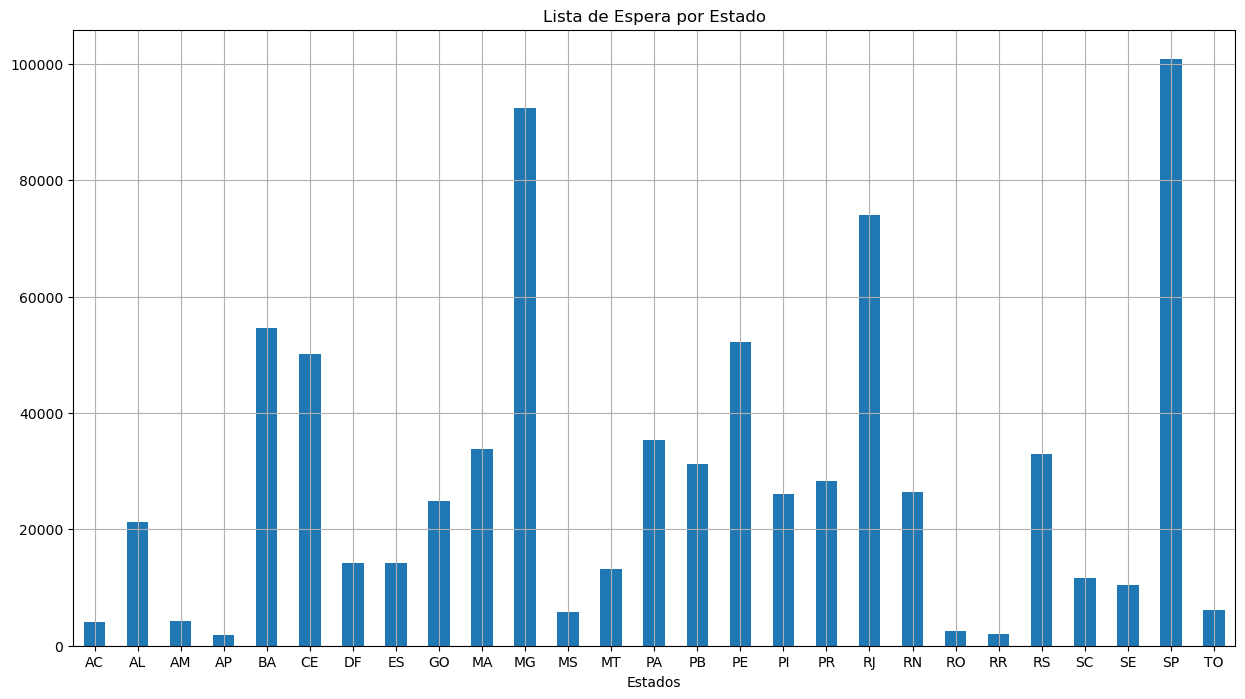

In [7]:
ap_estado_br = ListEsp.groupby('SG_UF_CANDIDATO').count()
ap_estado_br = ap_estado_br['NU_ANO']
ap_estado_br = ap_estado_br.rename_axis('Estados')
ap_estado_br.plot(kind='bar',title='Lista de Espera por Estado', figsize=(15,8), rot=0, grid=True)

<AxesSubplot:title={'center':'Vagas por Estado'}, xlabel='Estados'>

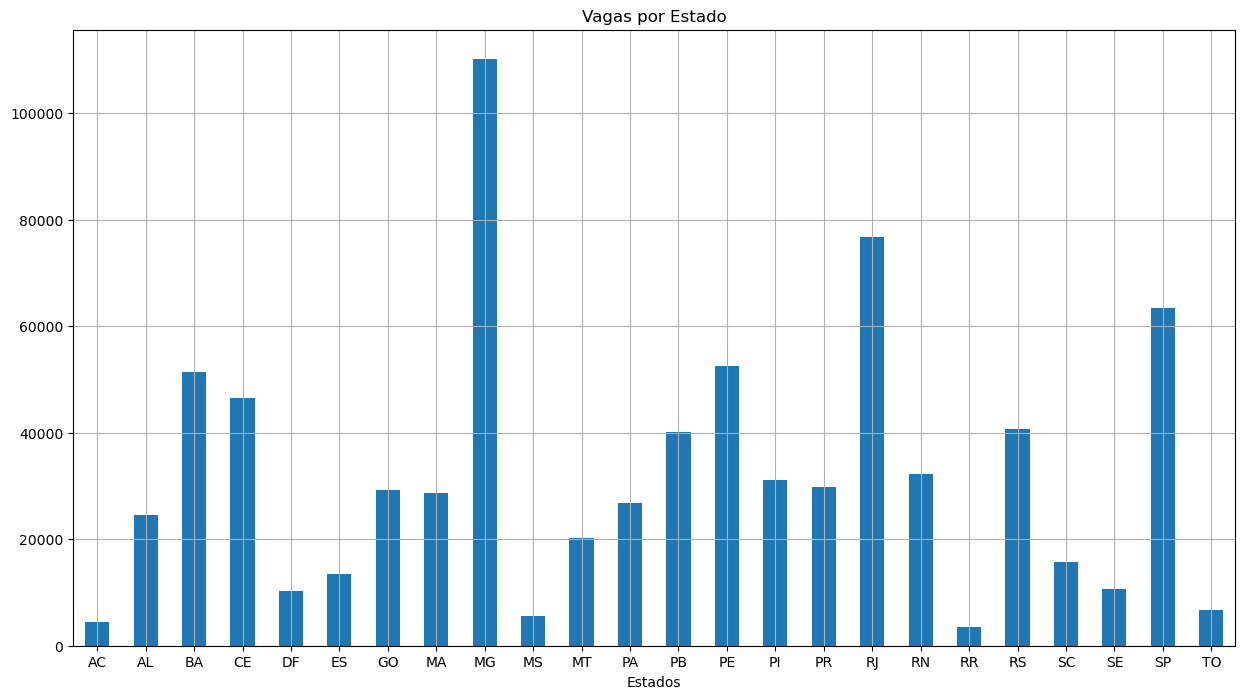

In [8]:
vaga_estado_br = ListEsp.groupby('SG_UF_CAMPUS').count()
vaga_estado_br = vaga_estado_br['NU_ANO']
vaga_estado_br = vaga_estado_br.rename_axis('Estados')
vaga_estado_br.plot(kind='bar',title='Vagas por Estado', figsize=(15,8), rot=0, grid=True)

<AxesSubplot:title={'center':'Lista de Espera e Vagas por Estado'}, xlabel='Estados'>

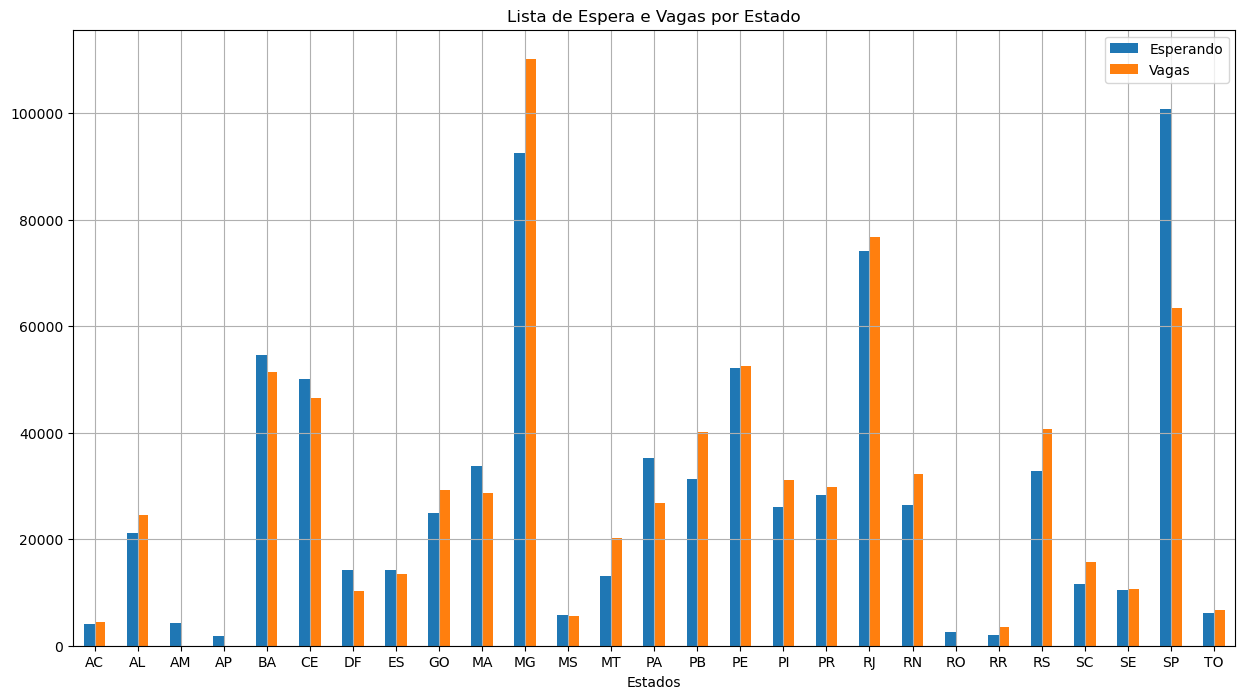

In [9]:
vaga_ap_br = pd.DataFrame(ap_estado_br)
vaga_ap_br['Vagas'] = vaga_estado_br
vaga_ap_br.columns = ['Esperando', 'Vagas']
vaga_ap_br = vaga_ap_br.rename_axis('Estados')
vaga_ap_br.plot(kind='bar',title='Lista de Espera e Vagas por Estado', figsize=(15,8), rot=0, grid=True)

# Concorrencia por sexo a nivel Brasil

In [10]:
br_masc_ampla = 0
br_fem_ampla = 0
br_masc_cota = 0
br_fem_cota = 0
for i in range(len(ListEsp['NU_ANO'])):
    if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
        if ListEsp['TP_SEXO'][i] == 'M':
            br_masc_ampla += 1
        else:
            br_fem_ampla += 1
    else:
        if ListEsp['TP_SEXO'][i] == 'M':
            br_masc_cota += 1
        else:
            br_fem_cota += 1

<AxesSubplot:title={'center':'Lista de Espera Brasil por Concorrência e Sexo'}>

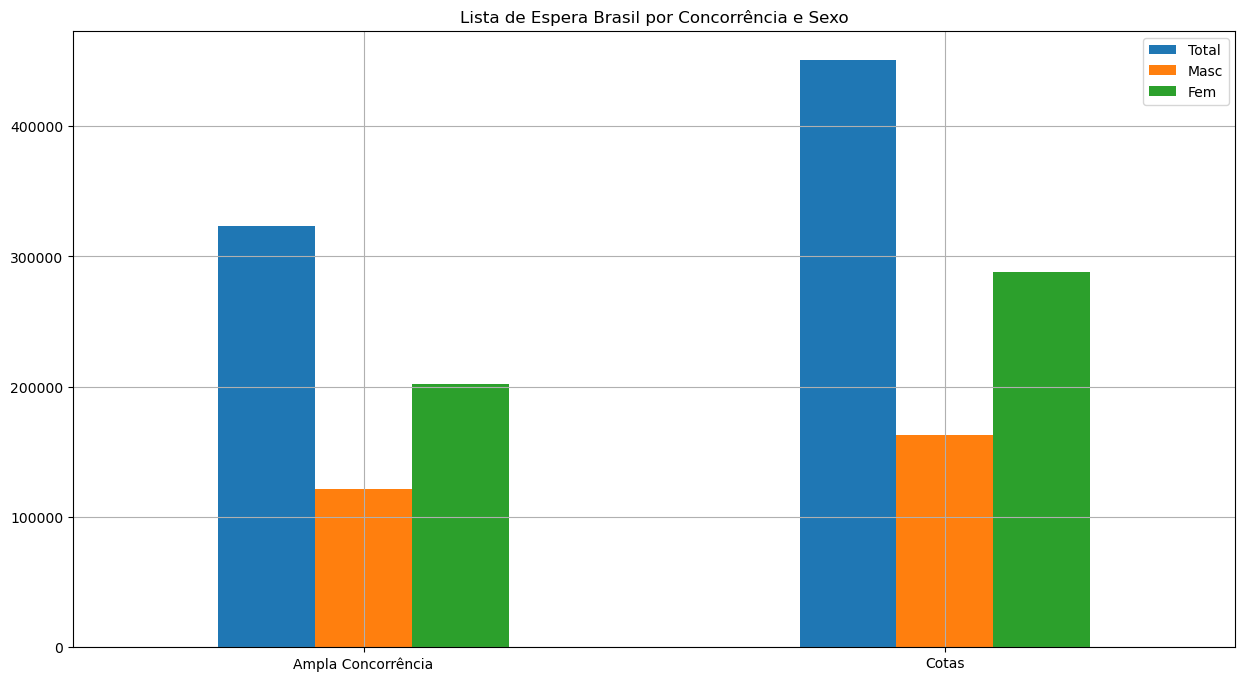

In [11]:
br_sexo_conc = pd.DataFrame([br_masc_ampla + br_fem_ampla, br_masc_cota + br_fem_cota], ['Ampla Concorrência', 'Cotas'])
br_sexo_conc.columns = ['Total']
br_sexo_conc['Masc'] = [br_masc_ampla, br_masc_cota]
br_sexo_conc['Fem'] = [br_fem_ampla, br_fem_cota]
br_sexo_conc.plot(kind='bar',title='Lista de Espera Brasil por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Reforço da dominancia feminina e mantem um padrão e relação a 20/2

# Alunos que saem de suas cidades - por sexo, por concorrência

<AxesSubplot:title={'center':'Lista de Espera que Estudam Onde Residem ou Não por sexo'}>

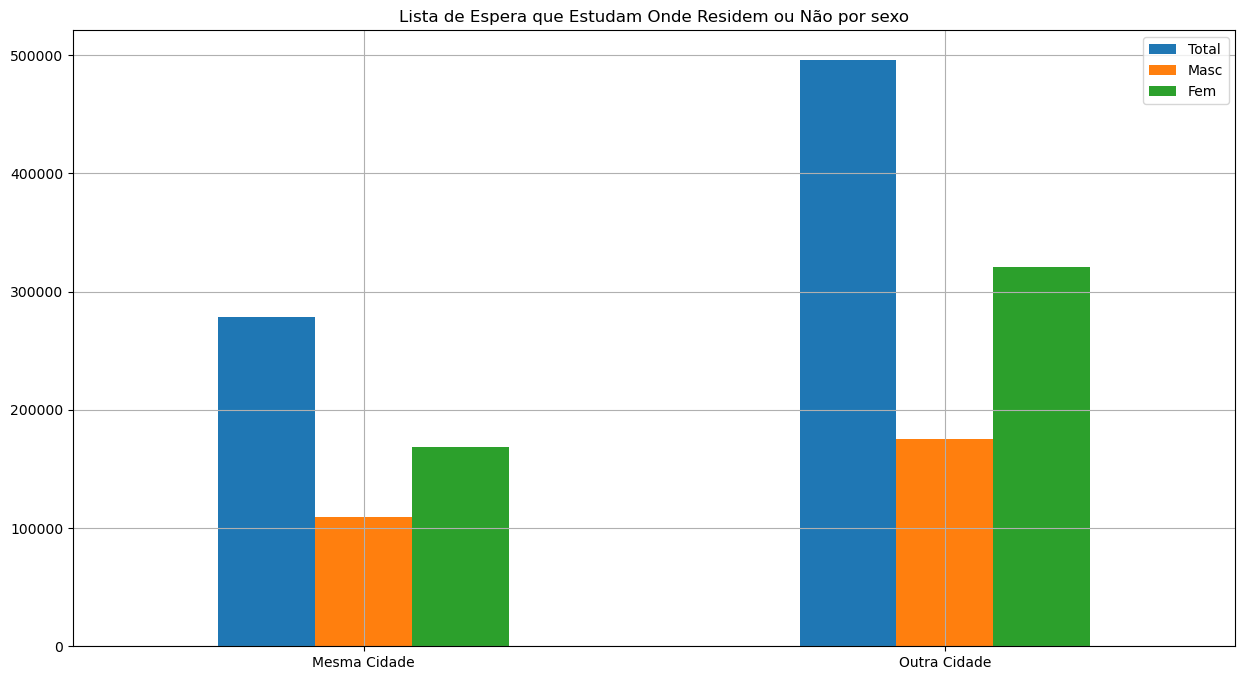

In [12]:
mesma_cidade = 0
mesma_cidade_H = 0
mesma_cidade_M = 0
outra_cidade = 0
outra_cidade_H = 0
outra_cidade_M = 0
for i in range(len(ListEsp['NU_ANO'])):
    if ListEsp['NO_MUNUCIPIO_CAMPUS'][i] == ListEsp['MUNICIPIO_CANDIDATO'][i]:
        mesma_cidade += 1
        if ListEsp['TP_SEXO'][i] == 'M':
            mesma_cidade_H += 1
        elif ListEsp['TP_SEXO'][i] == 'F':
            mesma_cidade_M += 1
    elif ListEsp['NO_MUNUCIPIO_CAMPUS'][i] != ListEsp['MUNICIPIO_CANDIDATO'][i]:
        outra_cidade += 1
        if ListEsp['TP_SEXO'][i] == 'M':
            outra_cidade_H += 1
        elif ListEsp['TP_SEXO'][i] == 'F':
            outra_cidade_M += 1

mesmo_municipio = pd.DataFrame([mesma_cidade, outra_cidade],['Mesma Cidade','Outra Cidade'])
mesmo_municipio.columns = ['Total']
mesmo_municipio['Masc'] = [mesma_cidade_H, outra_cidade_H]
mesmo_municipio['Fem'] = [mesma_cidade_M, outra_cidade_M]
mesmo_municipio.plot(kind='bar',title='Lista de Espera que Estudam Onde Residem ou Não por sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Pode-se ver uma diferença grande na tendência de estudar fora da cidade, mas menos acentuada que o semestre anterior

<AxesSubplot:title={'center':'Lista de Espera que Estudam Onde Residem ou Não por sexo'}>

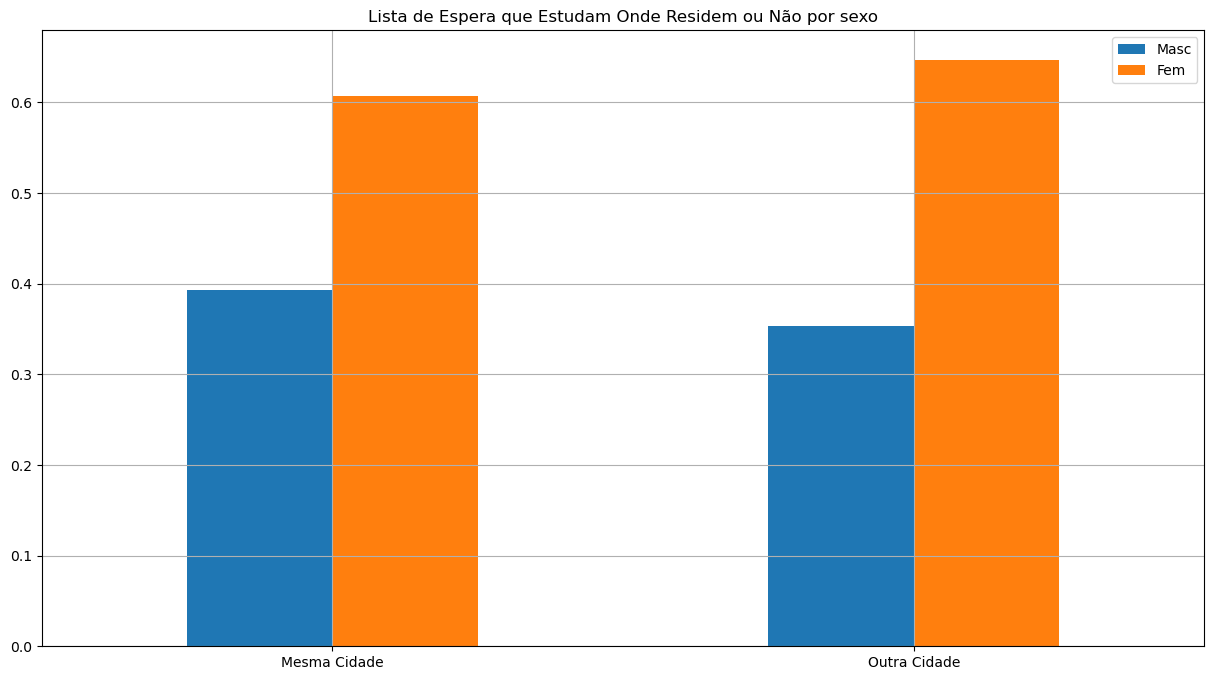

In [13]:
pc_mesmo_municipio = pd.DataFrame([mesma_cidade, outra_cidade],['Mesma Cidade','Outra Cidade'])
pc_mesmo_municipio.columns = ['Total']
pc_mesmo_municipio['Masc'] = [mesma_cidade_H / mesma_cidade, outra_cidade_H / outra_cidade]
pc_mesmo_municipio['Fem'] = [mesma_cidade_M / mesma_cidade, outra_cidade_M / outra_cidade]
pc_mesmo_municipio = pc_mesmo_municipio.drop('Total',axis=1)
pc_mesmo_municipio.plot(kind='bar',title='Lista de Espera que Estudam Onde Residem ou Não por sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Reforça a predominancia feminina e mantem as porcentagens do semestre anterior

<AxesSubplot:title={'center':'Lista de Espera que Estudam Onde Residem ou Não por Concorrência'}>

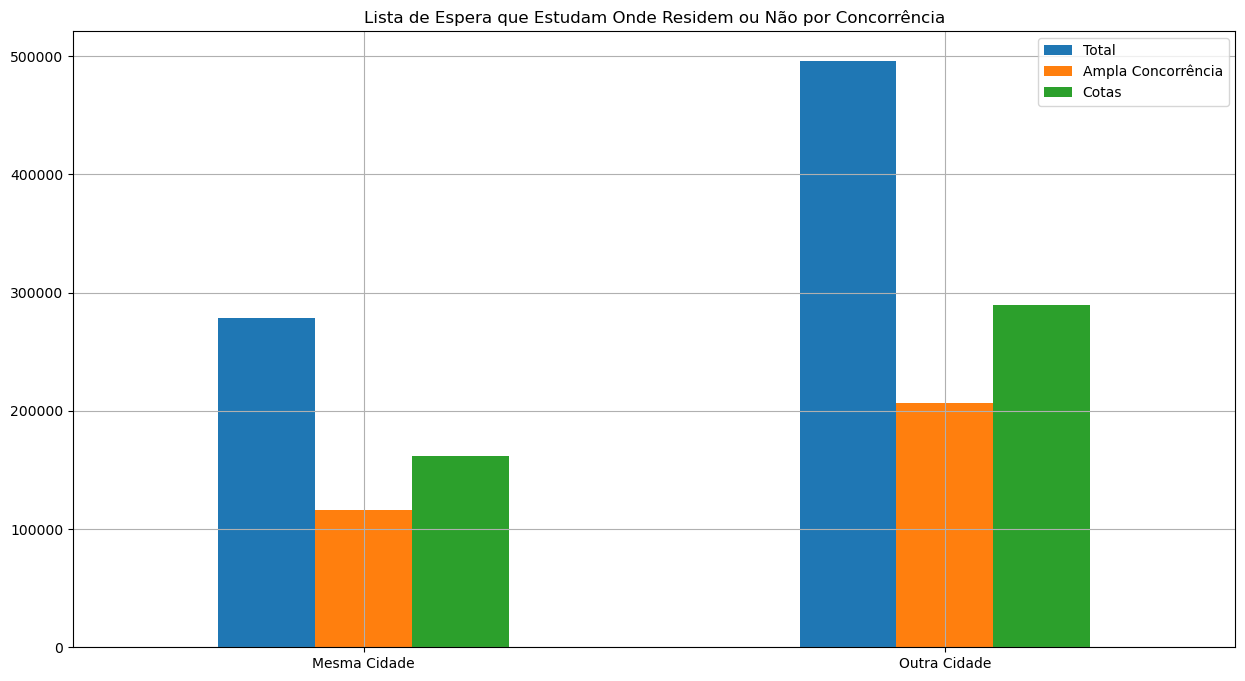

In [14]:
Ampla_Mesma = 0
Cota_Mesma = 0
Ampla_outra = 0
Cota_outra = 0
for i in range(len(ListEsp['NU_ANO'])):
    if ListEsp['NO_MUNUCIPIO_CAMPUS'][i] == ListEsp['MUNICIPIO_CANDIDATO'][i]:
        if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_Mesma += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_Mesma += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_Mesma += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_Mesma += 1
    else:
        if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_outra += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_outra += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_outra += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_outra += 1
mesmo_municipio_concorrencia = pd.DataFrame([mesma_cidade, outra_cidade],['Mesma Cidade','Outra Cidade'])
mesmo_municipio_concorrencia.columns = ['Total']
mesmo_municipio_concorrencia['Ampla Concorrência'] = [Ampla_Mesma, Ampla_outra]
mesmo_municipio_concorrencia['Cotas'] = [Cota_Mesma, Cota_outra]
mesmo_municipio_concorrencia.plot(kind='bar',title='Lista de Espera que Estudam Onde Residem ou Não por Concorrência', figsize=(15,8), rot=0, grid=True)

## OBS:
Reforça a tendência de mudança de cidade, mas mostra que as filas de cotas são maiores o que pode ser a vinda da região metropolitana

# Alunos que saem de seus estados - por sexo, por concorrência

<AxesSubplot:title={'center':'Lista de Espera que Estudam Onde Residem ou Não por sexo'}>

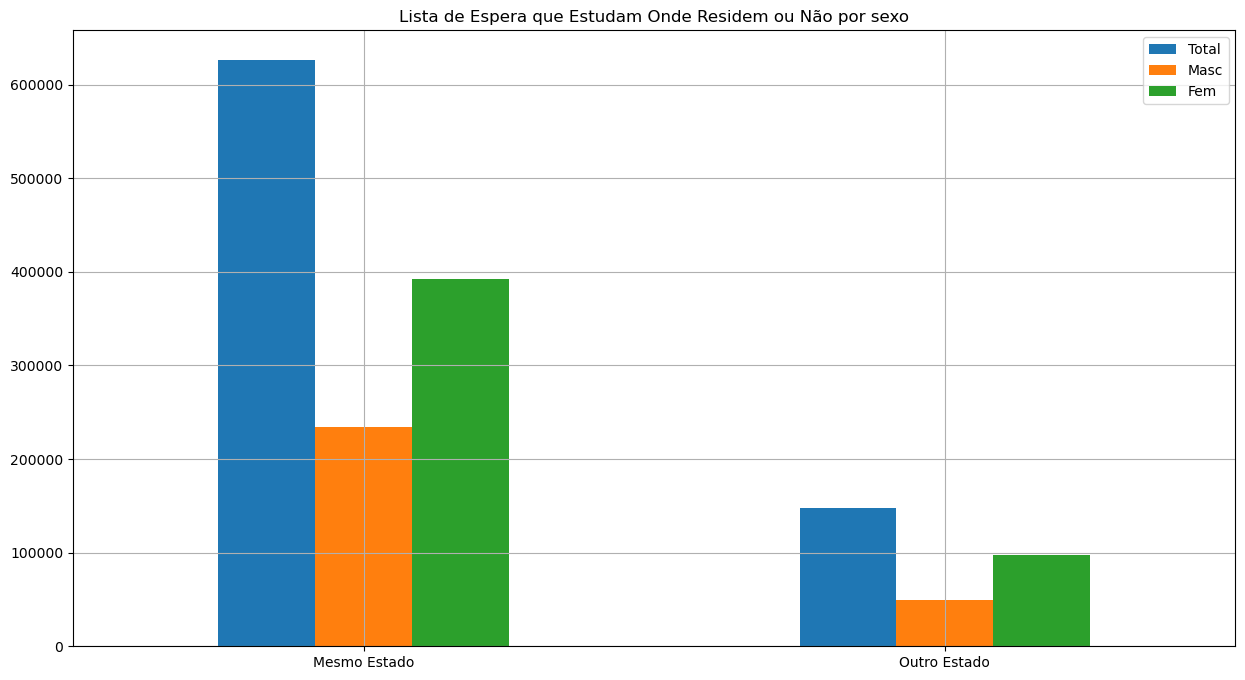

In [15]:
mesmo_estado_ = 0
mesmo_estado_H = 0
mesmo_estado_M = 0
outro_estado = 0
outro_estado_H = 0
outro_estado_M = 0
for i in range(len(ListEsp['NU_ANO'])):
    if ListEsp['SG_UF_CAMPUS'][i] == ListEsp['SG_UF_CANDIDATO'][i]:
        mesmo_estado_ += 1
        if ListEsp['TP_SEXO'][i] == 'M':
            mesmo_estado_H += 1
        elif ListEsp['TP_SEXO'][i] == 'F':
            mesmo_estado_M += 1
    elif ListEsp['SG_UF_CAMPUS'][i] != ListEsp['SG_UF_CANDIDATO'][i]:
        outro_estado += 1
        if ListEsp['TP_SEXO'][i] == 'M':
            outro_estado_H += 1
        elif ListEsp['TP_SEXO'][i] == 'F':
            outro_estado_M += 1

mesmo_estado = pd.DataFrame([mesmo_estado_, outro_estado],['Mesmo Estado','Outro Estado'])
mesmo_estado.columns = ['Total']
mesmo_estado['Masc'] = [mesmo_estado_H, outro_estado_H]
mesmo_estado['Fem'] = [mesmo_estado_M, outro_estado_M]
mesmo_estado.plot(kind='bar',title='Lista de Espera que Estudam Onde Residem ou Não por sexo', figsize=(15,8), rot=0, grid=True)


## OBS:
Tendência de se manter-se no mesmo estado aumenta em relação ao semestre anterior e predominância feminina na mudança

<AxesSubplot:title={'center':'Lista de Espera que Estudam no Mesmo Estado ou Não por sexo'}>

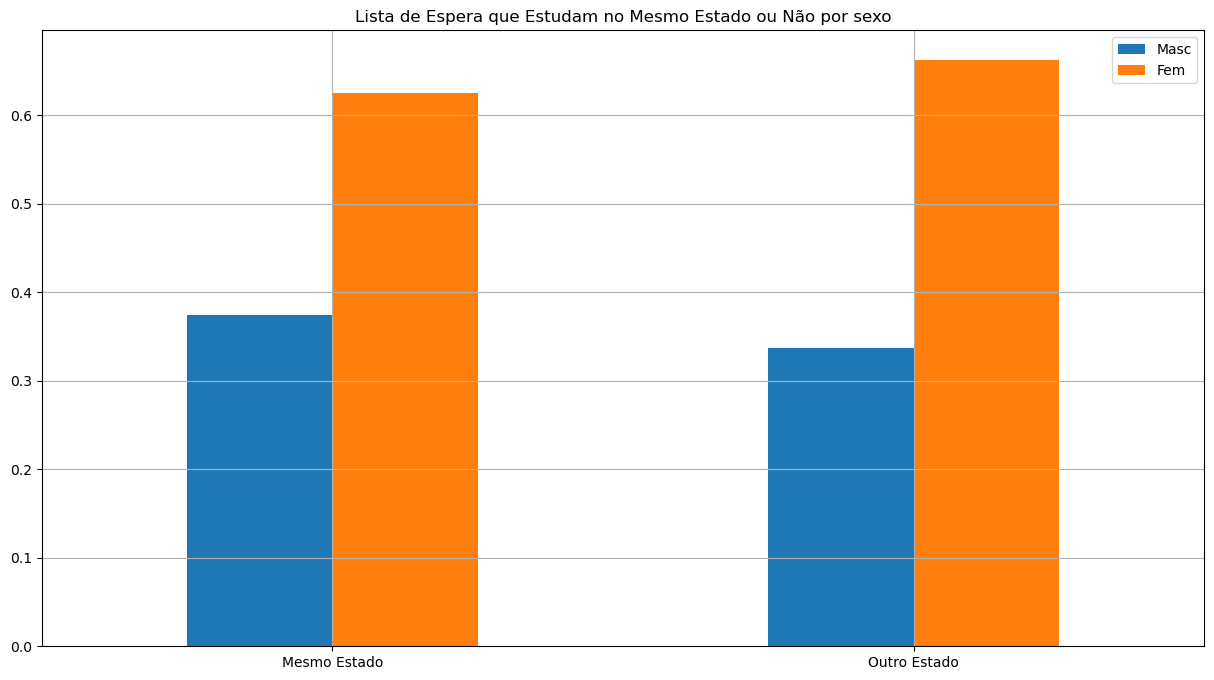

In [16]:
pc_mesmo_estado = pd.DataFrame([mesmo_estado_, outro_estado],['Mesmo Estado','Outro Estado'])
pc_mesmo_estado.columns = ['Total']
pc_mesmo_estado['Masc'] = [mesmo_estado_H / mesmo_estado_, outro_estado_H / outro_estado]
pc_mesmo_estado['Fem'] = [mesmo_estado_M / mesmo_estado_, outro_estado_M / outro_estado]
pc_mesmo_estado = pc_mesmo_estado.drop('Total', axis=1)
pc_mesmo_estado.plot(kind='bar',title='Lista de Espera que Estudam no Mesmo Estado ou Não por sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Tendência da predominancia feminina e valores se mantem do semestre anterior

<AxesSubplot:title={'center':'Lista de Espera que Estudam no Mesmo Estado ou Não por Concorrência'}>

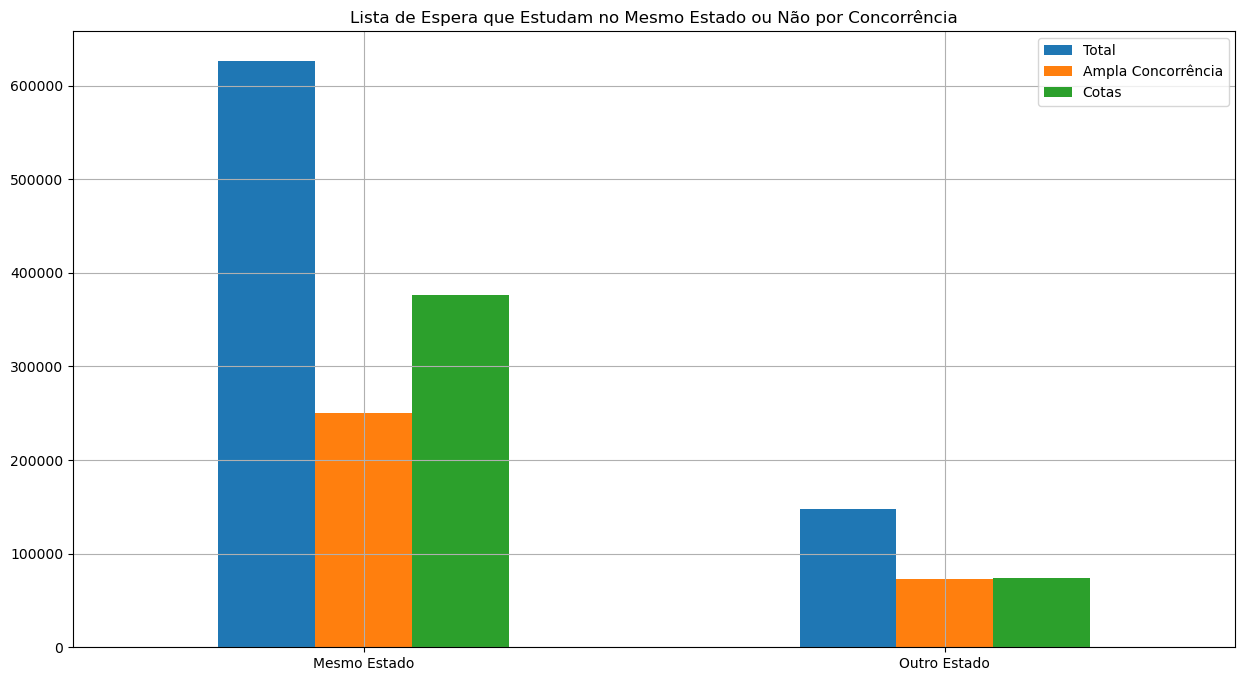

In [17]:
Ampla_Mesmo = 0
Cota_Mesmo = 0
Ampla_outro = 0
Cota_outro = 0
for i in range(len(ListEsp['NU_ANO'])):
    if ListEsp['SG_UF_CAMPUS'][i] == ListEsp['SG_UF_CANDIDATO'][i]:
        if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_Mesmo += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_Mesmo += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_Mesmo += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_Mesmo += 1
    else:
        if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
            Ampla_outro += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V':
            Cota_outro += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L':
            Cota_outro += 1
        elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B':
            Cota_outro += 1
mesmo_estado_concorrencia = pd.DataFrame([mesmo_estado_, outro_estado],['Mesmo Estado','Outro Estado'])
mesmo_estado_concorrencia.columns = ['Total']
mesmo_estado_concorrencia['Ampla Concorrência'] = [Ampla_Mesmo, Ampla_outro]
mesmo_estado_concorrencia['Cotas'] = [Cota_Mesmo, Cota_outro]
mesmo_estado_concorrencia.plot(kind='bar',title='Lista de Espera que Estudam no Mesmo Estado ou Não por Concorrência', figsize=(15,8), rot=0, grid=True)

## OBS:
Do estado do PR a fila de cota é maior, já de fora do estado existe um equilibrio. Já a tendência de se manter no mesmo estado aumentou em relação ao semestre anterior 

# Estudantes da UTFPR por sexo, concorrência  e se de fora ou não

In [18]:
#Alunos de fora do estado na UTFPR - por sexo, por concorrencia
#Alunos do estado em outras cidades na UTFPR - por sexo, por concorrencia
utf = 0
utf_M = 0
utf_H = 0
utf_ampla = 0
utf_ampla_H = 0
utf_ampla_M = 0
utf_cota = 0
utf_cota_H = 0
utf_cota_M = 0
utf_mesmo_estado = 0
utf_mesmo_estado_H = 0
utf_mesmo_estado_M = 0
utf_mesmo_estado_ampla = 0
utf_mesmo_estado_cota = 0
utf_outro_estado = 0
utf_outro_estado_H = 0
utf_outro_estado_M = 0
utf_outro_estado_ampla = 0
utf_outro_estado_cota = 0
utf_mesma_cidade = 0
utf_mesma_cidade_H = 0
utf_mesma_cidade_M = 0
utf_mesma_cidade_ampla = 0
utf_mesma_cidade_cota = 0
utf_outra_cidade = 0
utf_outra_cidade_H = 0
utf_outra_cidade_M = 0
utf_outra_cidade_ampla = 0
utf_outra_cidade_cota = 0

for i in range(len(ListEsp['NU_ANO'])):
    if ListEsp['SIGLA_IES'][i] == 'UTFPR':
        utf += 1
        if ListEsp['TP_SEXO'][i] == 'M':
            utf_H += 1
            if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                utf_ampla += 1
                utf_ampla_H += 1
            elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                utf_cota += 1
                utf_cota_H += 1
        elif ListEsp['TP_SEXO'][i] == 'F':
            utf_M += 1
            if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                utf_ampla += 1
                utf_ampla_M += 1
            elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                utf_cota += 1
                utf_cota_M += 1
        if ListEsp['SG_UF_CAMPUS'][i] == ListEsp['SG_UF_CANDIDATO'][i]:
            utf_mesmo_estado += 1
            if ListEsp['TP_SEXO'][i] == 'M':
                utf_mesmo_estado_H += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesmo_estado_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesmo_estado_cota += 1
            elif ListEsp['TP_SEXO'][i] == 'F':
                utf_mesmo_estado_M += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesmo_estado_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesmo_estado_cota += 1
        else:
            utf_outro_estado += 1
            if ListEsp['TP_SEXO'][i] == 'M':
                utf_outro_estado_H += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outro_estado_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outro_estado_cota += 1
            elif ListEsp['TP_SEXO'][i] == 'F':
                utf_outro_estado_M += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outro_estado_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outro_estado_cota += 1
        if ListEsp['NO_MUNUCIPIO_CAMPUS'][i] == ListEsp['MUNICIPIO_CANDIDATO'][i]:
            utf_mesma_cidade += 1
            if ListEsp['TP_SEXO'][i] == 'M':
                utf_mesma_cidade_H += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesma_cidade_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesma_cidade_cota += 1
            elif ListEsp['TP_SEXO'][i] == 'F':
                utf_mesma_cidade_M += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                     utf_mesma_cidade_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                     utf_mesma_cidade_cota += 1
        else:
            utf_outra_cidade += 1
            if ListEsp['TP_SEXO'][i] == 'M':
                utf_outra_cidade_H += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outra_cidade_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outra_cidade_cota += 1
            elif ListEsp['TP_SEXO'][i] == 'F':
                utf_outra_cidade_M += 1
                if ListEsp['TP_MOD_CONCORRENCIA'][i] == 'A':
                    utf_outra_cidade_ampla += 1
                elif ListEsp['TP_MOD_CONCORRENCIA'][i] == 'V' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'L' or ListEsp['TP_MOD_CONCORRENCIA'][i] == 'B': 
                    utf_outra_cidade_cota += 1

<AxesSubplot:title={'center':'Lista de Espera da UTFPR'}>

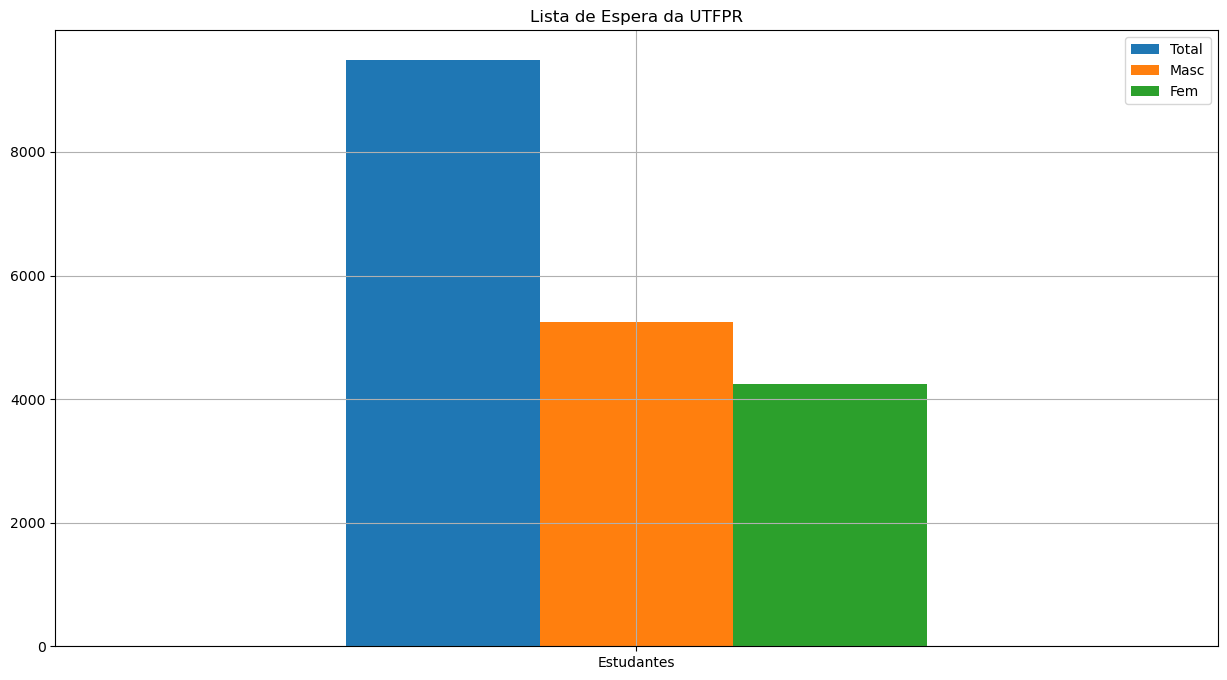

In [19]:
utf_tot = pd.DataFrame([utf],['Estudantes'])
utf_tot.columns = ['Total']
utf_tot['Masc'] = utf_H
utf_tot['Fem'] = utf_M
utf_tot.plot(kind='bar',title='Lista de Espera da UTFPR', figsize=(15,8), rot=0, grid=True)

## OBS:
Mudança para um aumento do publico masculino na lista

<AxesSubplot:title={'center':'Lista de Espera UTFPR por Concorrência e Sexo'}>

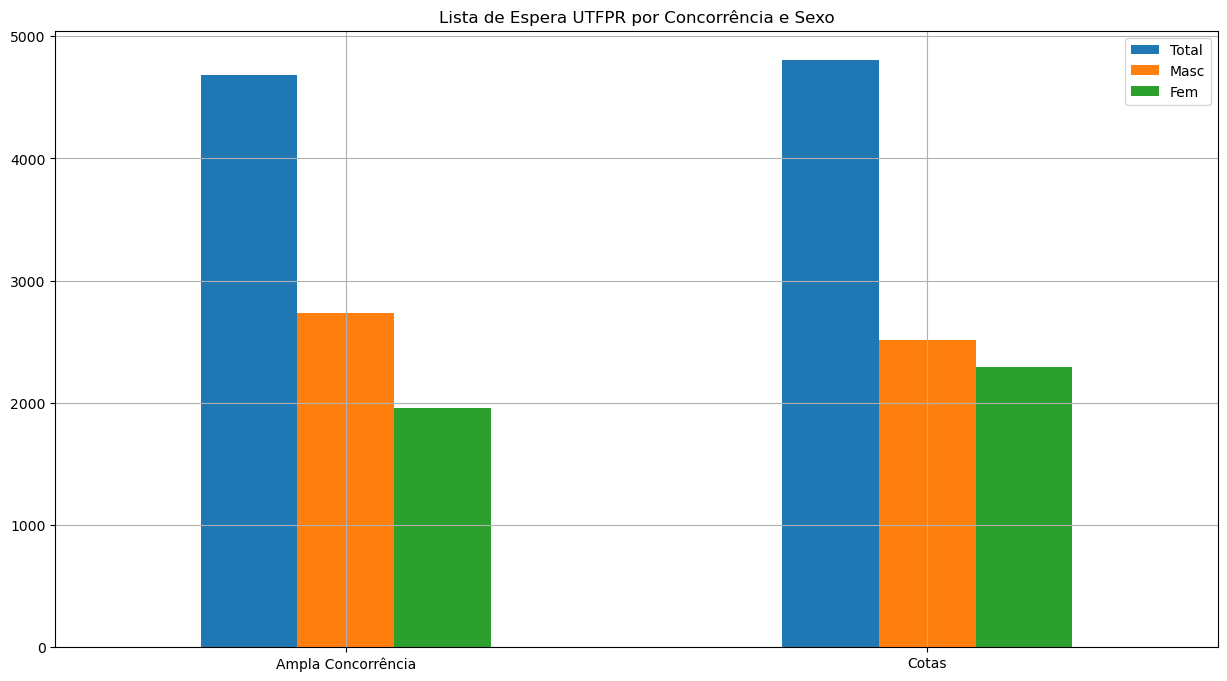

In [20]:
utf_conc = pd.DataFrame([utf_ampla, utf_cota], ['Ampla Concorrência', 'Cotas'])
utf_conc.columns = ['Total']
utf_conc['Masc'] = [utf_ampla_H, utf_cota_H]
utf_conc['Fem'] = [utf_ampla_M, utf_cota_M]
utf_conc.plot(kind='bar',title='Lista de Espera UTFPR por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Para ampla concorrência e para cotas a proporção masculina aumentou em relação ao semestre anterior onde pelo menos em cotas era predominante feminina 

<AxesSubplot:title={'center':'Lista de Espera UTFPR Do PR ou Fora por Concorrência e Sexo'}>

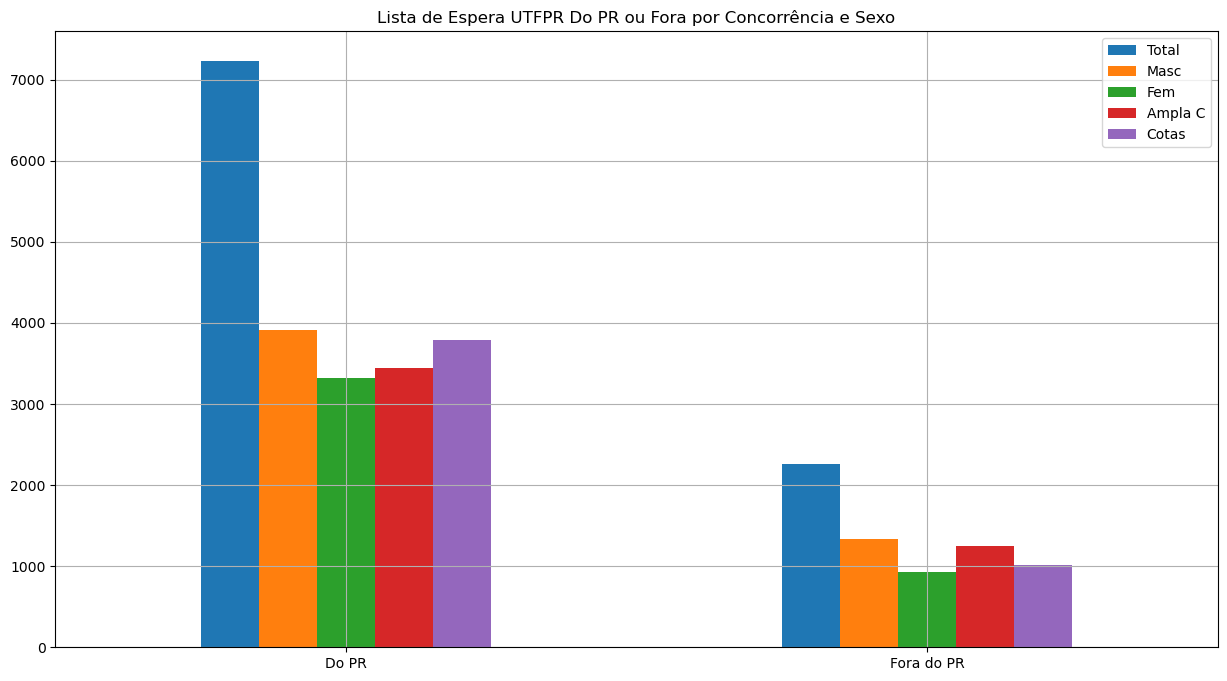

In [21]:
utf_PR = pd.DataFrame([utf_mesmo_estado, utf_outro_estado], ['Do PR', 'Fora do PR'])
utf_PR.columns = ['Total']
utf_PR['Masc'] = [utf_mesmo_estado_H, utf_outro_estado_H]
utf_PR['Fem'] = [utf_mesmo_estado_M, utf_outro_estado_M]
utf_PR['Ampla C'] = [utf_mesmo_estado_ampla, utf_outro_estado_ampla]
utf_PR['Cotas'] = [utf_mesmo_estado_cota, utf_outro_estado_cota]
utf_PR.plot(kind='bar',title='Lista de Espera UTFPR Do PR ou Fora por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Vemos uma redução grande do público de fora do PR e a redução do publico feminino em relação ao ano anterior, os demais dados se mantem próximos

<AxesSubplot:title={'center':'Lista de Espera UTFPR da Cidade do Campus ou Fora por Concorrência e Sexo'}>

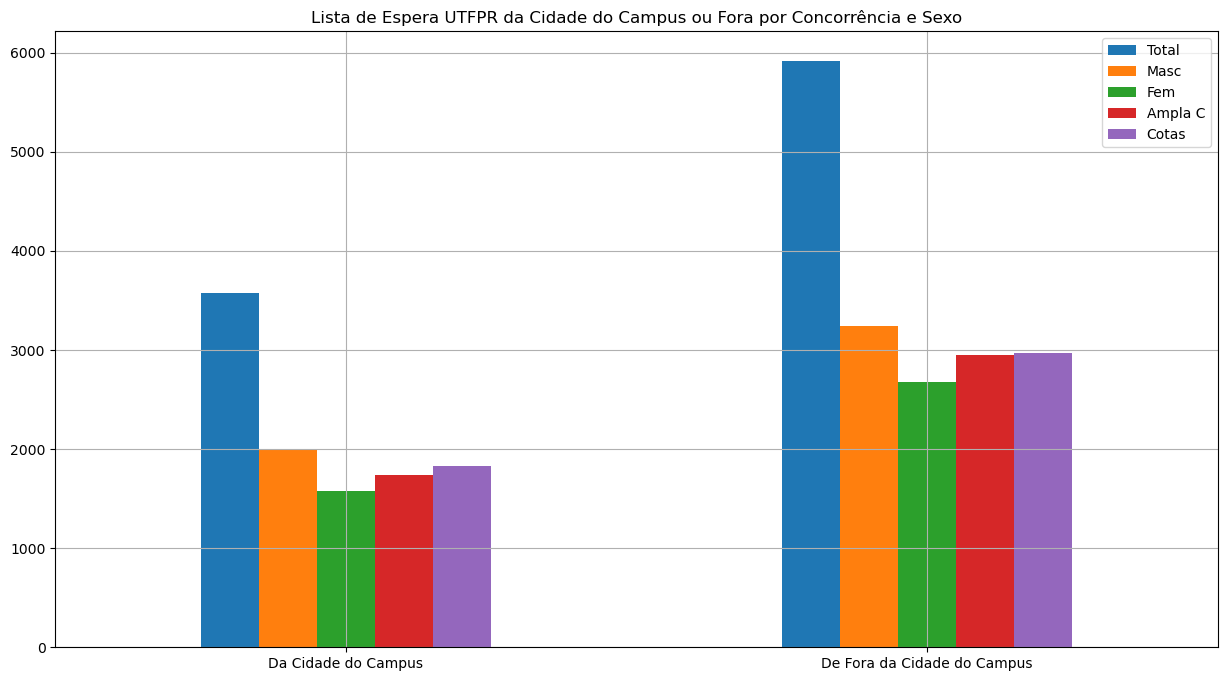

In [22]:
utf_Cidade = pd.DataFrame([utf_mesma_cidade, utf_outra_cidade], ['Da Cidade do Campus', 'De Fora da Cidade do Campus'])
utf_Cidade.columns = ['Total']
utf_Cidade['Masc'] = [utf_mesma_cidade_H, utf_outra_cidade_H]
utf_Cidade['Fem'] = [utf_mesma_cidade_M, utf_outra_cidade_M]
utf_Cidade['Ampla C'] = [utf_mesma_cidade_ampla, utf_outra_cidade_ampla]
utf_Cidade['Cotas'] = [utf_mesma_cidade_cota, utf_outra_cidade_cota]
utf_Cidade.plot(kind='bar',title='Lista de Espera UTFPR da Cidade do Campus ou Fora por Concorrência e Sexo', figsize=(15,8), rot=0, grid=True)

## OBS:
Verificamos que os dados são equilibrados e reforçam as analises comentadas acima 